In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model

In [ ]:
from keras.applications.vgg19 import VGG19
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "drive/My Drive/Datasets/ecg-dataset.zip"

Streaming output truncated to the last 5000 lines.
  inflating: ECG_Image_data/train/V/V1869.png  
  inflating: ECG_Image_data/train/V/V187.png  
  inflating: ECG_Image_data/train/V/V1870.png  
  inflating: ECG_Image_data/train/V/V1871.png  
  inflating: ECG_Image_data/train/V/V1872.png  
  inflating: ECG_Image_data/train/V/V1874.png  
  inflating: ECG_Image_data/train/V/V1877.png  
  inflating: ECG_Image_data/train/V/V1879.png  
  inflating: ECG_Image_data/train/V/V188.png  
  inflating: ECG_Image_data/train/V/V1880.png  
  inflating: ECG_Image_data/train/V/V1881.png  
  inflating: ECG_Image_data/train/V/V1882.png  
  inflating: ECG_Image_data/train/V/V1883.png  
  inflating: ECG_Image_data/train/V/V1884.png  
  inflating: ECG_Image_data/train/V/V1885.png  
  inflating: ECG_Image_data/train/V/V1886.png  
  inflating: ECG_Image_data/train/V/V1887.png  
  inflating: ECG_Image_data/train/V/V1889.png  
  inflating: ECG_Image_data/train/V/V1892.png  
  inflating: ECG_Image_data/train/V/V18

In [ ]:
IMAGE_SIZE = [224, 224]

train_path = './ECG_Image_data/train'
valid_path = './ECG_Image_data/test'

In [ ]:
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

80134624/80134624 [==============================] - 3s 0us/step


In [ ]:
for layer in vgg.layers:
  layer.trainable = False

In [ ]:
folders = glob('./ECG_Image_data/train/*')

In [ ]:
folders

['./ECG_Image_data/train/Q',
 './ECG_Image_data/train/F',
 './ECG_Image_data/train/S',
 './ECG_Image_data/train/V',
 './ECG_Image_data/train/N',
 './ECG_Image_data/train/M']

In [ ]:
x = Flatten()(vgg.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

In [ ]:
model = Model(inputs=vgg.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('./ECG_Image_data/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 99199 images belonging to 6 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('./ECG_Image_data/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 24799 images belonging to 6 classes.


In [ ]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-20-5932e3024fde>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/10
3100/3100 [==============================] - 1496s 480ms/step - loss: 0.0292 - accuracy: 0.9925 - val_loss: 0.0024 - val_accuracy: 0.9993
Epoch 2/10
3100/3100 [==============================] - 1459s 471ms/step - loss: 0.0087 - accuracy: 0.9975 - val_loss: 0.0018 - val_accuracy: 0.9994
Epoch 3/10
3100/3100 [==============================] - 1450s 468ms/step - loss: 0.0069 - accuracy: 0.9984 - val_loss: 8.6030e-04 - val_accuracy: 0.9996
Epoch 4/10
3100/3100 [==============================] - 1442s 465ms/step - loss: 0.0090 - accuracy: 0.9982 - val_loss: 0.0052 - val_accuracy: 0.9989
Epoch 5/10
3100/3100 [==============================] - 1441s 465ms/step - loss: 0.0048 - accuracy: 0.9991 - val_loss: 0.0072 - val_accuracy: 0.9982
Epoch 6/10
3100/3100 [==============================] - 1434s 462ms/step - loss: 0.0062 - accuracy: 0.9988 - val_loss: 0.0290 - val_accuracy: 0.9967
Epoch 7/10
3100/3100 [==============================] - 1433s 462ms/step - loss: 0.0019 - accuracy: 0.

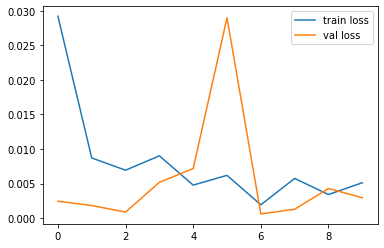

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

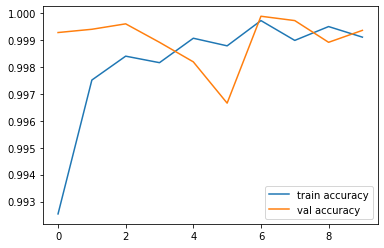

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_accuracy')

In [ ]:
import tensorflow as tf

In [ ]:
from keras.models import load_model


In [ ]:
model.save('model_v6.h5')

In [ ]:
y_pred = model.predict(test_set)

775/775 [==============================] - 134s 173ms/step


In [ ]:
y_pred

array([[2.0549215e-30, 2.9426412e-30, 1.0000000e+00, 0.0000000e+00,
        4.0686259e-37, 2.8538870e-25],
       [1.4491973e-30, 8.6252662e-33, 1.0000000e+00, 0.0000000e+00,
        1.4825234e-37, 1.5236667e-30],
       [9.5076426e-34, 1.9657908e-32, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.8284340e-27],
       ...,
       [5.2520841e-33, 1.2916151e-38, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 5.0162789e-33],
       [9.1659016e-34, 8.3577716e-30, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 3.3224811e-27],
       [7.5236076e-33, 2.8293376e-38, 1.0000000e+00, 5.4285993e-37,
        0.0000000e+00, 2.1869693e-22]], dtype=float32)

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([2, 2, 2, ..., 2, 2, 2])

In [ ]:
# Application of the model 

In [10]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt


from keras.models import load_model
import keras.utils as image

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
!unzip "drive/My Drive/Datasets/ecg-dataset.zip"

Streaming output truncated to the last 5000 lines.
  inflating: ECG_Image_data/train/V/V1869.png  
  inflating: ECG_Image_data/train/V/V187.png  
  inflating: ECG_Image_data/train/V/V1870.png  
  inflating: ECG_Image_data/train/V/V1871.png  
  inflating: ECG_Image_data/train/V/V1872.png  
  inflating: ECG_Image_data/train/V/V1874.png  
  inflating: ECG_Image_data/train/V/V1877.png  
  inflating: ECG_Image_data/train/V/V1879.png  
  inflating: ECG_Image_data/train/V/V188.png  
  inflating: ECG_Image_data/train/V/V1880.png  
  inflating: ECG_Image_data/train/V/V1881.png  
  inflating: ECG_Image_data/train/V/V1882.png  
  inflating: ECG_Image_data/train/V/V1883.png  
  inflating: ECG_Image_data/train/V/V1884.png  
  inflating: ECG_Image_data/train/V/V1885.png  
  inflating: ECG_Image_data/train/V/V1886.png  
  inflating: ECG_Image_data/train/V/V1887.png  
  inflating: ECG_Image_data/train/V/V1889.png  
  inflating: ECG_Image_data/train/V/V1892.png  
  inflating: ECG_Image_data/train/V/V18

In [8]:
model=load_model('model_v6.h5')

In [11]:
img=image.load_img('./ECG_Image_data/train/N/N1.png',target_size=(224,224))
x=image.img_to_array(img)
x.shape
x=x/255
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape
result = model.predict(img_data)

1/1 [==============================] - 1s 1s/step


In [13]:
itemindex=np.argmax(result, axis=1)

In [14]:
if(itemindex==1):
    print("Uninfected")
else:
    print("Infected")

Infected


In [15]:
itemindex = np.where(result==np.max(result))

In [16]:
len(itemindex)

2

In [17]:
itemindex

(array([0]), array([2]))

In [19]:
reverse_mapping = ['F','M','N','Q','F','V']

prediction_name = reverse_mapping[itemindex[1][0]]
print(prediction_name)

N
